In [1]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time

import pytz

import astroplan
import astroplan.constraints
from astroplan import Observer, FixedTarget, ObservingBlock
from astroplan import GreedyScheduler, SequentialScheduler, Transitioner
from astroplan import plots
color_cycle = plots.mplstyles.astropy_mpl_style['axes.color_cycle']

In [3]:
start_time = Time.now()
end_time = start_time+48*u.hour
print(start_time,end_time)

(<Time object: scale='utc' format='datetime' value=2016-03-25 16:07:50.364416>, <Time object: scale='utc' format='datetime' value=2016-03-27 16:07:50.364416>)


In [4]:
#time_diff = end_time.to(u.jd) - start_time.to(u.jd)

In [5]:
min_exposure=2*u.hour
times = start_time + u.Quantity(np.arange(0,(end_time - start_time).value, min_exposure.to(u.day).value), unit=u.day)

In [6]:
len(times)

24

In [7]:
mdm = Observer.at_site('mdm', timezone=pytz.timezone('US/Arizona'))
print(mdm)

<Observer: name='mdm',
    location (lon, lat, el)=(-111.616666667 deg, 31.95 deg, 1938.0 m),
    timezone=<DstTzInfo 'US/Arizona' LMT-1 day, 16:32:00 STD>>


In [8]:
targets = [FixedTarget.from_name('Vega'),
           FixedTarget.from_name('Deneb'),
           FixedTarget.from_name('Arcturus'),
           FixedTarget.from_name('Altair'),
           FixedTarget.from_name('Aldebaran'),
           FixedTarget.from_name('Sirius'),
           FixedTarget.from_name('Betelgeuse'),
           FixedTarget.from_name('Rigel'),
           FixedTarget.from_name('Castor'),
           FixedTarget.from_name('Pollux'),
           FixedTarget.from_name('Polaris')
          ]
targets

[<FixedTarget "Vega" at SkyCoord (ICRS): (ra, dec) in deg (279.23473479, 38.78368896)>,
 <FixedTarget "Deneb" at SkyCoord (ICRS): (ra, dec) in deg (310.35797975, 45.28033881)>,
 <FixedTarget "Arcturus" at SkyCoord (ICRS): (ra, dec) in deg (213.9153003, 19.18240916)>,
 <FixedTarget "Altair" at SkyCoord (ICRS): (ra, dec) in deg (297.6958273, 8.8683212)>,
 <FixedTarget "Aldebaran" at SkyCoord (ICRS): (ra, dec) in deg (68.98016279, 16.50930235)>,
 <FixedTarget "Sirius" at SkyCoord (ICRS): (ra, dec) in deg (101.28715533, -16.71611586)>,
 <FixedTarget "Betelgeuse" at SkyCoord (ICRS): (ra, dec) in deg (88.79293899, 7.40706399)>,
 <FixedTarget "Rigel" at SkyCoord (ICRS): (ra, dec) in deg (78.63446707, -8.20163837)>,
 <FixedTarget "Castor" at SkyCoord (ICRS): (ra, dec) in deg (113.64947164, 31.88828222)>,
 <FixedTarget "Pollux" at SkyCoord (ICRS): (ra, dec) in deg (116.32895777, 28.02619889)>,
 <FixedTarget "Polaris" at SkyCoord (ICRS): (ra, dec) in deg (37.95456067, 89.26410897)>]

In [9]:
etime = 5*u.min
n = 10
rot = 55*u.second

blocks = []
for i,t in enumerate(targets):
    blocks.append(ObservingBlock.from_exposures(t, i, etime, n, rot))

In [10]:
constraints = [astroplan.constraints.AirmassConstraint(3, boolean_constraint=False),
               astroplan.constraints.AtNightConstraint()
               #,astroplan.constraints.MoonSeparationConstraint(5*u.deg)
               ]

In [11]:
observable = constraints[0].compute_constraint(times,mdm,[targets[0]])
print(observable)

If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)


If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)




[[ 0.92950572  0.68725007  0.          0.          0.          0.          0.
   0.          0.22196506  0.79904734  0.96384386  0.99490407  0.92522576
   0.67338789  0.          0.          0.          0.          0.          0.
   0.2579015   0.80800256  0.96650773  0.99430515]]


In [12]:
print(start_time,type(start_time))
print(start_time.jd)

(<Time object: scale='utc' format='datetime' value=2016-03-25 16:07:50.364416>, <class 'astropy.time.core.Time'>)
2457473.17211


In [13]:
scheduler = GreedyScheduler(start_time, end_time,
                                constraints=constraints, observer=mdm)
schedule = scheduler(blocks)


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]

>>> from astroplan import download_IERS_A
>>> download_IERS_A()



<FixedTarget "Vega" at SkyCoord (ICRS): (ra, dec) in deg (279.23473479, 38.78368896)>
2457475.04364 2457475.08473
<FixedTarget "Deneb" at SkyCoord (ICRS): (ra, dec) in deg (310.35797975, 45.28033881)>
2457474.01875 2457474.05984
<FixedTarget "Arcturus" at SkyCoord (ICRS): (ra, dec) in deg (213.9153003, 19.18240916)>
2457473.88507 2457473.92616
<FixedTarget "Altair" at SkyCoord (ICRS): (ra, dec) in deg (297.6958273, 8.8683212)>
2457474.99908 2457475.04017
<FixedTarget "Aldebaran" at SkyCoord (ICRS): (ra, dec) in deg (68.98016279, 16.50930235)>
2457473.57315 2457473.61424
<FixedTarget "Sirius" at SkyCoord (ICRS): (ra, dec) in deg (101.28715533, -16.71611586)>
2457474.59804 2457474.63912
<FixedTarget "Betelgeuse" at SkyCoord (ICRS): (ra, dec) in deg (88.79293899, 7.40706399)>
2457473.61771 2457473.6588
<FixedTarget "Rigel" at SkyCoord (ICRS): (ra, dec) in deg (78.63446707, -8.20163837)>
2457474.6426 2457474.68368
<FixedTarget "Castor" at SkyCoord (ICRS): (ra, dec) in deg (113.64947164, 31

In [14]:
for sblock in schedule:
    local_start = mdm.astropy_time_to_datetime(sblock.start_time)
    if hasattr(sblock, 'target'):
        print(sblock.target.name, 'starting @', local_start, 'lasting', sblock.duration)
    else:
        print('trans starting @', local_start, 'lasting', sblock.duration, ':', sblock.components)

('Aldebaran', 'starting @', datetime.datetime(2016, 3, 25, 18, 45, 20, 364390, tzinfo=<DstTzInfo 'US/Arizona' MST-1 day, 17:00:00 STD>), 'lasting', <Quantity 59.16666666666667 min>)
('Betelgeuse', 'starting @', datetime.datetime(2016, 3, 25, 19, 49, 30, 364389, tzinfo=<DstTzInfo 'US/Arizona' MST-1 day, 17:00:00 STD>), 'lasting', <Quantity 59.16666666666667 min>)
('Castor', 'starting @', datetime.datetime(2016, 3, 25, 20, 53, 40, 364387, tzinfo=<DstTzInfo 'US/Arizona' MST-1 day, 17:00:00 STD>), 'lasting', <Quantity 59.16666666666667 min>)
('Polaris', 'starting @', datetime.datetime(2016, 3, 25, 21, 57, 50, 364386, tzinfo=<DstTzInfo 'US/Arizona' MST-1 day, 17:00:00 STD>), 'lasting', <Quantity 59.16666666666667 min>)
('Arcturus', 'starting @', datetime.datetime(2016, 3, 26, 2, 14, 30, 364380, tzinfo=<DstTzInfo 'US/Arizona' MST-1 day, 17:00:00 STD>), 'lasting', <Quantity 59.16666666666667 min>)
('Deneb', 'starting @', datetime.datetime(2016, 3, 26, 5, 27, 0, 364375, tzinfo=<DstTzInfo 'US/A

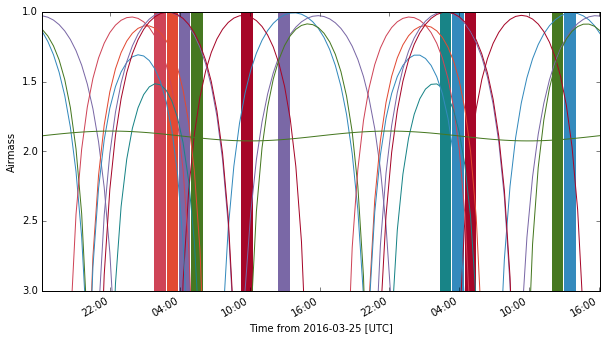

In [20]:
plt.figure(figsize=(10,5))
ts = start_time + np.linspace(0, (end_time-start_time).value, 100)*u.day
targ_to_color = {}
for target, c in zip(targets, np.append(color_cycle,color_cycle)):
    plots.plot_airmass(target, mdm, ts, style_kwargs=dict(color=c))
    targ_to_color[target.name] = c
#plt.legend(loc=2)

for block in schedule:
    if hasattr(block, 'target'):
        plt.axvspan(block.start_time.plot_date, block.end_time.plot_date, 
                    fc=targ_to_color[block.target.name], lw=0)
ax=plt.gca()
